In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Gathering Data

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv', sep=',')

In [3]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open(os.path.join(os.getcwd(),
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(r.content)

In [5]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
# A dictionary to build and convert to a DataFrame later
df_tweet_json = []

In [7]:
tweet_json_file = 'tweet-json.txt'

# Load "tweet_json.txt"
with open('tweet-json.txt') as tweet_json:
    
    # Get each line and load it as a json object
    for a_line in tweet_json:
        line_data_json = json.loads(a_line)

        tweet_id = line_data_json['id']

        retweet_count = line_data_json['retweet_count']

        favorite_count = line_data_json['favorite_count']

        creation_date = line_data_json['created_at']

        tweet_full_text = line_data_json['full_text']

        df_tweet_json.append({'tweet_id': tweet_id,
                            'created_at': creation_date,
                            'retweet_count': retweet_count,
                            'favorite_count': favorite_count,
                            'tweet_full_text': tweet_full_text})

In [8]:
# Convert the dictionary to a DataFrame
df_tweet = pd.DataFrame(df_tweet_json, columns = ['tweet_id', 'created_at', 'retweet_count', 'favorite_count', 'tweet_full_text'])

In [9]:
df_tweet

,tweet_id,created_at,retweet_count,favorite_count,tweet_full_text
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8204,37636,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6071,32337,This is Tilly. She's just checking pup on you....
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4011,24363,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8366,40959,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9063,39161,This is Franklin. He would like you to stop ca...
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,3008,19691,Here we have a majestic great white breaching ...
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,1988,11515,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,18232,63499,When you watch your owner call another dog a g...
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,4129,27080,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,7126,31027,This is Cassie. She is a college pup. Studying...


# Assessing Data

### image_predictions

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Missing dataset it 2075 rows insted of 2356

In [11]:
image_predictions['jpg_url'].value_counts().head(20)

https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg    2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg                2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg                2
https://pbs.twimg.com/med

In [12]:
image_predictions[image_predictions['jpg_url'] == 'https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1492,782969140009107456,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
1640,807059379405148160,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True


In [13]:
image_predictions['tweet_id'].value_counts().tail(20)

693155686491000832    1
793601777308463104    1
740373189193256964    1
754482103782404096    1
881536004380872706    1
843604394117681152    1
748307329658011649    1
759846353224826880    1
885984800019947520    1
773922284943896577    1
666345417576210432    1
837482249356513284    1
812781120811126785    1
870804317367881728    1
790698755171364864    1
816829038950027264    1
847971574464610304    1
713175907180089344    1
670338931251150849    1
700151421916807169    1
Name: tweet_id, dtype: int64

####  jpg_url duplicest for same tweet id 

# twitter_archive

In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
print(twitter_archive['text'][350])
print(twitter_archive['name'][16])

This is Dutch. He dressed up as his favorite emoji for Valentine's Day. I've got heart eyes for his heart eyes. 13/10 https://t.co/BCbmFYLrse
Jim


In [16]:
twitter_archive.name.value_counts().head(70)

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Bailey        7
Toby          7
Daisy         7
Buddy         7
an            7
Leo           6
Jax           6
Koda          6
Stanley       6
Dave          6
Jack          6
Milo          6
Oscar         6
Scout         6
Rusty         6
Bella         6
Gus           5
           ... 
Finn          5
Alfie         5
Reggie        4
Winnie        4
Moose         4
Scooter       4
Derek         4
Beau          4
Clarence      4
Maggie        4
Cassie        4
Duke          4
quite         4
Chip          4
Gerald        4
Archie        4
Sampson       4
Reginald      4
Jeffrey       4
Luna          4
Carl          4
one           4
Loki          4
Bruce         4
Bear          4
Shadow        4
Ruby          4
Boomer        4
Maximus       4
Jerry         4
Name: name, Length: 70, 

##### Names of dogs that starts with small letter will exluded  & have invalid names like "a" " an"

In [17]:
print(twitter_archive.doggo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64


In [18]:
twitter_archive[twitter_archive['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [19]:
twitter_archive[twitter_archive['rating_denominator'] >= 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [20]:
twitter_archive[twitter_archive['rating_numerator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### The numerator and denominator columns have invalid values
rating_numerator and rating_denominator data type needs to be converted to float

In [21]:
type(twitter_archive.timestamp[1])

str

#### The data type of  timestamp should be `datetime` (string)

In [22]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### There are 4 kinds of source the users used 
- iphone 
- Vine
- Twitter Web
- tweetdeck
##### We can replce the it with the type

In [23]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### **3)df_tweetr**

In [24]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 5 columns):
tweet_id           2337 non-null int64
created_at         2337 non-null object
retweet_count      2337 non-null int64
favorite_count     2337 non-null int64
tweet_full_text    2337 non-null object
dtypes: int64(3), object(2)
memory usage: 91.4+ KB


In [25]:
df_tweet.head()

,tweet_id,created_at,retweet_count,favorite_count,tweet_full_text
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8204,37636,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6071,32337,This is Tilly. She's just checking pup on you....
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4011,24363,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8366,40959,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9063,39161,This is Franklin. He would like you to stop ca...


In [26]:
df_tweet.favorite_count.describe()

count      2337.000000
mean       7862.566966
std       12186.974365
min           0.000000
25%        1368.000000
50%        3423.000000
75%        9635.000000
max      162549.000000
Name: favorite_count, dtype: float64

In [27]:
df_tweet.retweet_count.describe()

count     2337.000000
mean      2885.241763
std       4874.060031
min          1.000000
25%        581.000000
50%       1348.000000
75%       3360.000000
max      82678.000000
Name: retweet_count, dtype: float64

In [28]:
df_tweet.isnull().sum()

tweet_id           0
created_at         0
retweet_count      0
favorite_count     0
tweet_full_text    0
dtype: int64

## 1)Twitter archive data

### quality:

**1**  There are 23 cases where the denominator of rating != 10. These entries will be removed.

**2**  remove many cases of where the rating_numerator is smaler than 10

**3**  remove many cases of where the rating_denominator is smaler than 10

**4** Rename columns with more appropriate names: "timestamp" to "tweet_timestamp", "text" to "tweet_text", "rating_numerator" to "dog_rating_out_of_ten", "name" to "dog_name"

**5** Since retweets and replies will be removed, the column "retweeted_status_timestamp" will be removed as it will no longer provide any useful information.

**6** Remove column "rating_denominator" once all the values that != 10 have been removed since this will no longer provide any useful information.

### tidiness:

**1**  There are 181 retweets which need to be removed. All columns related to “retweets” will be removed ,we can drop all columns related to retweets.

**2** No need to all the coulmn in images dataset just tweet_id and jpg_url what we need 


**3** There are 4 kinds of source the users used We can replce the it with the type

**4)** drop rating_denominator and rename rating_numerator to rating 


- iphone 
- Vine
- Twitter Web
- tweetdeck

**5)** The data type of  timestamp should be `datetime` (string)

## 2)df_tweet

### quality&tidiness :


**1** After trying to merge the data, it appears that there is some non-numeric values for the "tweet_id" inputs which will need to be removed. 

## 3) image_predictions
### quality&tidiness :

**1** Missing values from images dataset (2075 rows instead of 2356)

**2** Some tweet_ids have the same jpg_url



# Cleaning Data

### 1) Twitter archive data:

In [29]:
twitter_archive_clean = twitter_archive.copy()


### Quality Issues

### First we count the missing stages

In [30]:
print(twitter_archive_clean.puppo.value_counts())

None     2326
puppo      30
Name: puppo, dtype: int64


In [31]:
print(twitter_archive_clean.doggo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64


In [32]:
print(twitter_archive_clean.pupper.value_counts())

None      2099
pupper     257
Name: pupper, dtype: int64


In [33]:
print(twitter_archive_clean.floofer.value_counts())

None       2346
floofer      10
Name: floofer, dtype: int64


In [34]:
def extract_puppo(row):
    found = row['text'].lower().find("puppo")
    if found != -1:
        return "puppo"
    else:
        return

# Code : function which extract "doggo" from the text
def extract_doggo(row):
    found = row['text'].lower().find("doggo")
    if found != -1:
        return "doggo"
    else:
        return

# Code : function which extract "pupper" from the text
def extract_pupper(row):
    found = row['text'].lower().find("pupper")
    if found != -1:
        return "pupper"
    else:
        return
    # Code : function which extract "pupper" from the text
def extract_pupper(row):
    found = row['text'].lower().find("floofer")
    if found != -1:
        return "floofer"
    else:
        return 

In [35]:
twitter_archive_clean['puppo'] = twitter_archive_clean.apply(extract_puppo, axis=1)

In [36]:
twitter_archive_clean['doggo'] = twitter_archive_clean.apply(extract_doggo, axis=1)

In [37]:
twitter_archive_clean['pupper'] = twitter_archive_clean.apply(extract_pupper, axis=1)

In [38]:
twitter_archive_clean['floofer'] = twitter_archive_clean.apply(extract_pupper, axis=1)

In [39]:
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,107,10,10,38
unique,1,1,1,1
top,doggo,floofer,floofer,puppo
freq,107,10,10,38


In [40]:
def set_stage(row):
    stage = None
    
    # Collect doggo and any other stage encoutered separated by a ","
    if(row['doggo'] == "doggo"):
        if stage != None:
            stage = stage + "," + "doggo"
            print("more floofer : " + stage)
        else:
            stage = "doggo"
    
    # Collect floofer and any other stage encoutered separated by a ","
    if(row['floofer'] == "floofer"):
            
        if stage != None:
            stage = stage + "," + "floofer"
            print("more floofer : " + stage)
        else:
            stage = "floofer"
    
    # Collect pupper and any other stage encoutered separated by a ","
    if(row['pupper'] == "pupper"):
                
        if stage != None:
            stage = stage + "," + "pupper"
            print("more pupper : " + stage)
        else:
            stage = "pupper"
 # Collect puppo and any other stage encoutered separated by a ","
    if(row['puppo'] == "puppo"):
                    
        if stage != None:
            stage = stage + "," + "puppo"
            print("more puppo : " + stage)
        else:
            stage = "puppo"
                
    return stage
    
#source : https://github.com/jlcossi/wrangle_and_analyze_twitter_data/blob/master/wrangle_act.ipynb

In [41]:
 # Code : set the new column using the previous functions
twitter_archive_clean['stage'] = twitter_archive_clean.apply(set_stage, axis=1)

more puppo : doggo,puppo
more puppo : doggo,puppo
more floofer : doggo,floofer


In [42]:
# Clean the non useful columns
twitter_archive_clean.drop('puppo', axis=1, inplace=True)
twitter_archive_clean.drop('doggo', axis=1, inplace=True)
twitter_archive_clean.drop('floofer', axis=1, inplace=True)
twitter_archive_clean.drop('pupper', axis=1, inplace=True)

In [43]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [44]:
twitter_archive_clean.stage.value_counts()

doggo            104
puppo             36
floofer            9
doggo,puppo        2
doggo,floofer      1
Name: stage, dtype: int64

In [45]:
twitter_archive_clean.drop(twitter_archive_clean.loc[twitter_archive_clean['stage']== "doggo,floofer"].index, inplace=True)

In [46]:
twitter_archive_clean.drop(twitter_archive_clean.loc[twitter_archive_clean['stage']== "doggo,puppo"].index, inplace=True)

In [47]:
# Define
# 1)  Removing multiple cases of where the denominator of rating != 10.

# Code
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].index, inplace = True)

In [48]:
# Test
twitter_archive_clean.rating_denominator.value_counts()

10    2330
Name: rating_denominator, dtype: int64

**2)** Multiple cases of where the numerator of rating < 10. These entries will be removed.



In [49]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_numerator > 15].index, inplace = True)

In [50]:
# Test
twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = True)

0       2
1       8
2       9
3      19
4      15
5      37
6      32
7      54
8     102
9     156
10    461
11    462
12    558
13    349
14     54
15      2
Name: rating_numerator, dtype: int64

In [51]:
# Define
# 3) Multiple cases where numerator of rating >> 10. These entries will be assessed and removed if not authentic. 

# Code 1
twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = True)

0       2
1       8
2       9
3      19
4      15
5      37
6      32
7      54
8     102
9     156
10    461
11    462
12    558
13    349
14     54
15      2
Name: rating_numerator, dtype: int64

In [52]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [53]:
twitter_archive_clean.rating_numerator.value_counts()

12    558
11    462
10    461
13    349
9     156
8     102
7      54
14     54
5      37
6      32
3      19
4      15
2       9
1       8
15      2
0       2
Name: rating_numerator, dtype: int64

In [54]:
# Define
# d) Rename columns with more appropriate names: "timestamp" to "tweet_timestamp", 
#    "text" to "tweet_text", "rating_numerator" to "dog_rating_out_of_ten", "name" to "dog_name",

# Code
new_names = {'timestamp': 'tweet_timestamp', 'text': 'tweet_text',\
             'rating_numerator': 'dog_rating_out_of_ten', 'name': 'dog_name'}


twitter_archive_clean.rename(columns=new_names, inplace=True)

In [55]:
# Test
list(twitter_archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_timestamp',
 'source',
 'tweet_text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'dog_rating_out_of_ten',
 'rating_denominator',
 'dog_name',
 'stage']

### Tidiness Issues

**1) 2)** There are colimn that we dont need


In [56]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp',
                                    'in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

In [57]:
# Test
list(twitter_archive_clean.columns)

['tweet_id',
 'tweet_timestamp',
 'source',
 'tweet_text',
 'expanded_urls',
 'dog_rating_out_of_ten',
 'rating_denominator',
 'dog_name',
 'stage']

**3)** There are 4 kinds of source the users used We can replce the it with the type

In [58]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2186
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [59]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2186
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

**4)** drop rating_denominator and rename rating_numerator to rating 

In [60]:
twitter_archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)
twitter_archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

**5)** The data type of  timestamp should be `datetime` (string)

In [61]:
twitter_archive_clean['tweet_timestamp'] = pd.to_datetime(twitter_archive_clean['tweet_timestamp'])

# df_tweet

In [62]:
df_tweet.columns

Index(['tweet_id', 'created_at', 'retweet_count', 'favorite_count',
       'tweet_full_text'],
      dtype='object')

In [63]:
# Define
# 1)rename the tweet_id so match the other
df_tweet_clean=df_tweet.rename(columns= {'id': 'tweet_id'})

In [64]:
df_tweet.columns

Index(['tweet_id', 'created_at', 'retweet_count', 'favorite_count',
       'tweet_full_text'],
      dtype='object')

# image_predictions

In [65]:
archive_predictions_clean = image_predictions.copy()

In [66]:
archive_predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**1)**  i will create two new columns in predictions called breed and confidence: 
check each dog breed prediction flag in order 
(p1_dog, p2_dog, p3_dog), and copy the breed with the highest confidence level into the breed column.
Copy the associated confidence level into the new confidence column.
For cases where all 3 prediction flags are False (NOT a valid dog breed),
set breed as 'none' and confidence to 0.

In [67]:
# source https://github.com/stephanderton/We-Rate-Dogs-Data-Wrangling-Project/blob/master/wrangle_act.ipynb
# setup the conditions for selection
conditions = [(archive_predictions_clean['p1_dog'] == True),
              (archive_predictions_clean['p2_dog'] == True),
              (archive_predictions_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [archive_predictions_clean['p1'], 
                 archive_predictions_clean['p2'],
                 archive_predictions_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [archive_predictions_clean['p1_conf'], 
                      archive_predictions_clean['p2_conf'], 
                      archive_predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
archive_predictions_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
archive_predictions_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

In [68]:
archive_predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,none,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


In [69]:
archive_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


i will merge the breed and confidence columns to twitter_archive_clean after the two columns are merged, we can drop them from the 'predictions' table change data type for the confidence interval to a rounded, whole integer (%)

In [70]:
# merge the breed and confidence columns to twitter_archive_clean after the two columns are merged, we can drop them from the 'predictions' tablechange data type for the confidence interval to a rounded, whole integer (%)
mask_cols = ['tweet_id', 'breed', 'confidence']
twitter_archive_clean = pd.merge(twitter_archive_clean, archive_predictions_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

In [71]:
archive_predictions_clean.confidence = (archive_predictions_clean.confidence * 100).astype(int)

In [72]:
archive_predictions_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

In [73]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2048
Data columns (total 10 columns):
tweet_id                 2049 non-null int64
tweet_timestamp          2049 non-null datetime64[ns]
source                   2049 non-null object
tweet_text               2049 non-null object
expanded_urls            2049 non-null object
dog_rating_out_of_ten    2049 non-null int64
dog_name                 2049 non-null object
stage                    117 non-null object
breed                    2049 non-null object
confidence               2049 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 176.1+ KB


# Analyze Data

In [74]:
dog_rate = twitter_archive_clean.copy()

In [75]:
dog_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2048
Data columns (total 10 columns):
tweet_id                 2049 non-null int64
tweet_timestamp          2049 non-null datetime64[ns]
source                   2049 non-null object
tweet_text               2049 non-null object
expanded_urls            2049 non-null object
dog_rating_out_of_ten    2049 non-null int64
dog_name                 2049 non-null object
stage                    117 non-null object
breed                    2049 non-null object
confidence               2049 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 176.1+ KB


# insght 

In [76]:
df_temp_tweets = twitter_archive_clean.merge(df_tweet[['tweet_id', 'retweet_count', 'favorite_count']], how='left', on='tweet_id')

In [77]:
df_temp_tweets.shape

(2049, 12)

In [78]:
df_temp_tweets.head()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,dog_rating_out_of_ten,dog_name,stage,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,none,0.000000,8204.0,37636.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,Chihuahua,0.323581,6071.0,32337.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,Chihuahua,0.716012,4011.0,24363.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,Labrador_retriever,0.168086,8366.0,40959.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,basset,0.555712,9063.0,39161.0


 ### save the datafram into csv file

In [79]:
df_temp_tweets.to_csv('twitter_archive_master.csv')

# analysis and insights

## Insight 1

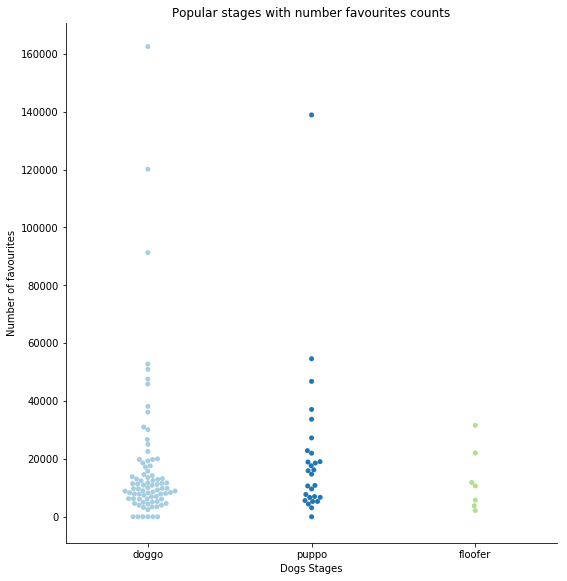

In [80]:
theplot = sns.catplot(x="stage", y="favorite_count", 
                      kind="swarm", 
                      data=df_temp_tweets, 
                      height=8,
                      palette = "Paired")

theplot.set(title='Popular stages with number favourites counts',
           xlabel='Dogs Stages', 
           ylabel='Number of favourites');

as we see in chat each stage along with  of most Popular stage with count of favouraites 



## Insight 2

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


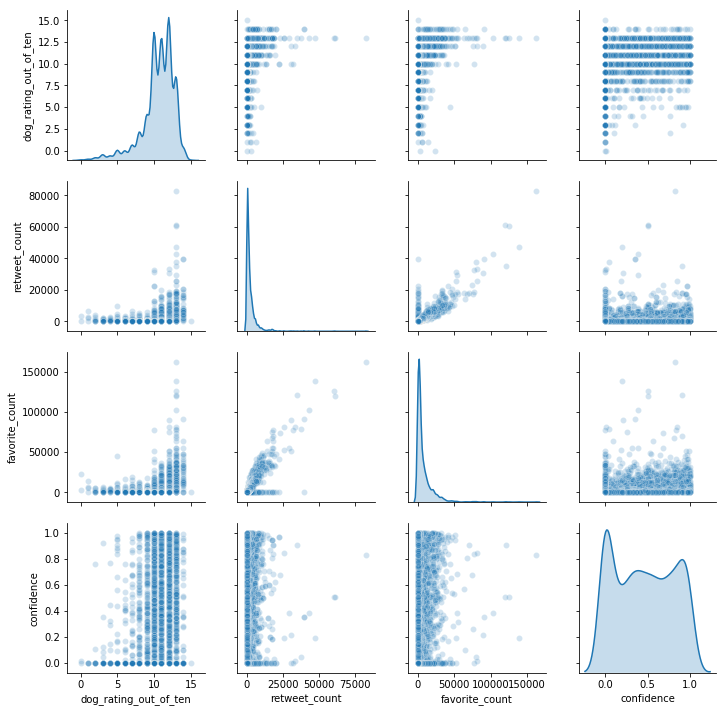

In [81]:
sns.pairplot(df_temp_tweets, 
             vars = ['dog_rating_out_of_ten', 'retweet_count', 'favorite_count', 'confidence'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.2});


## Insight 3

In [82]:
the_most_liked_bred = df_temp_tweets[df_temp_tweets.breed != 'none']
the_most_liked_bred = the_most_liked_bred.groupby(['breed'])
the_most_liked_bred = the_most_liked_bred['favorite_count'].sum()
the_most_liked_bred = the_most_liked_bred.sort_values(ascending = False)
top10the_most_liked_bred = the_most_liked_bred.head(10)
top10the_most_liked_bred

breed
golden_retriever      1815259.0
Labrador_retriever    1163081.0
Pembroke              1006844.0
Chihuahua              710764.0
French_bulldog         583316.0
Samoyed                536965.0
chow                   431699.0
cocker_spaniel         394087.0
pug                    363985.0
malamute               340162.0
Name: favorite_count, dtype: float64

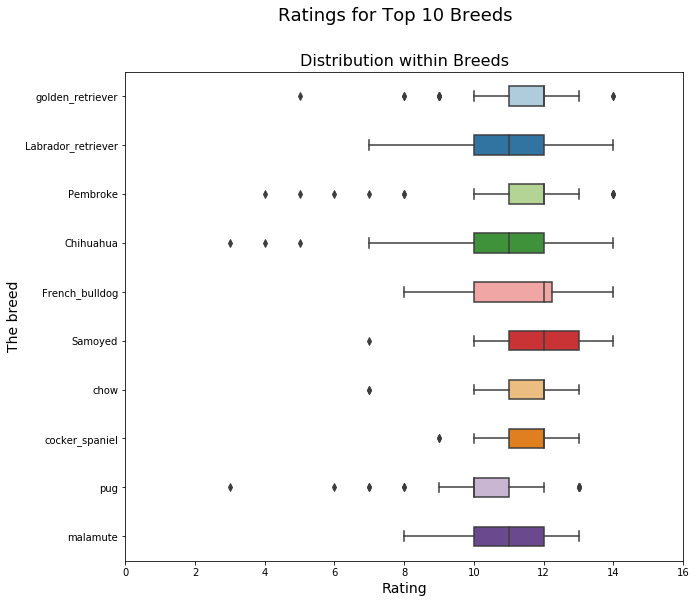

In [83]:
plt.figure(figsize = (10, 9))
bplot = sns.boxplot(y = 'breed', x = 'dog_rating_out_of_ten',
                    data = df_temp_tweets,
                    orient = 'h',
                    width = 0.4,
                    palette = "Paired",
                    order = top10the_most_liked_bred.index.tolist())
plt.xlim(0, 16)
plt.suptitle('Ratings for Top 10 Breeds', fontsize = 18)
plt.title('Distribution within Breeds', fontsize = 16)
plt.ylabel("The breed",  fontsize = 14)
plt.xlabel('Rating',  fontsize = 14)
plt.show()

the box plots shows that that top ten god breeds along with rating and as we see the values between between 7 and 14, with a only a few outliers 

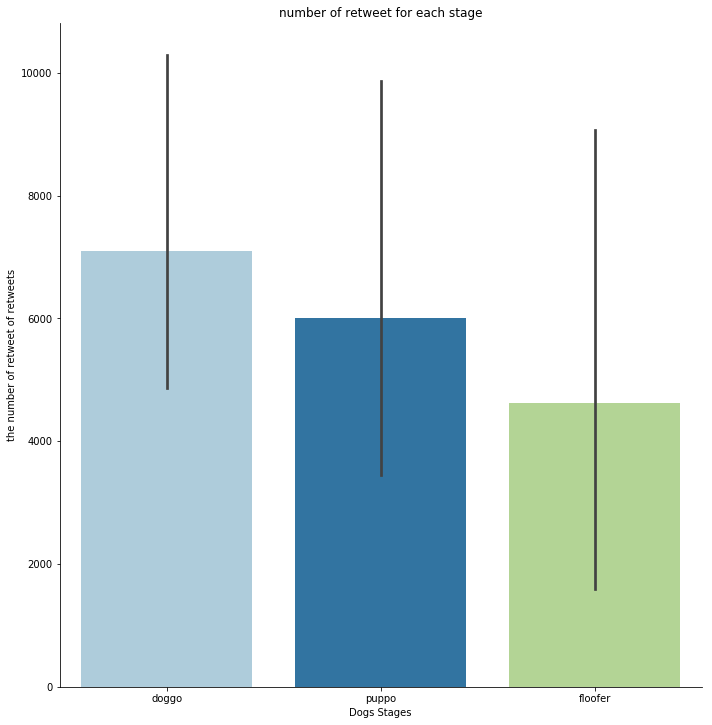

In [84]:
retweetplot = sns.catplot(x="stage", y="retweet_count", 
                          kind="bar", 
                          data=df_temp_tweets ,
                          height=10,
                          palette = "Paired")
retweetplot.set(title='number of retweet for each stage',
                xlabel='Dogs Stages', 
                ylabel='the number of retweet of retweets');

this bar chat shwos the number of tweets and the stage of the dog as we see dogoo has the highes number of tweets